# Gradinet Boosting Regression on MCR & MT Data

16 - 03 - 2023 | tuned other parameters, changeed name to gbr

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file = r'/content/drive/MyDrive/Colab/xgb-mcr/dataset.csv'

Data

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

'''
# random sample of dataset
def fraction(df, percentage):
    return df.sample(frac=percentage)

df_frac = fraction(df, 0.5)
'''
# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(len(X))
Y = dataset[:, 5] # mcr column
print(len(Y))

179996
179996


Scatter

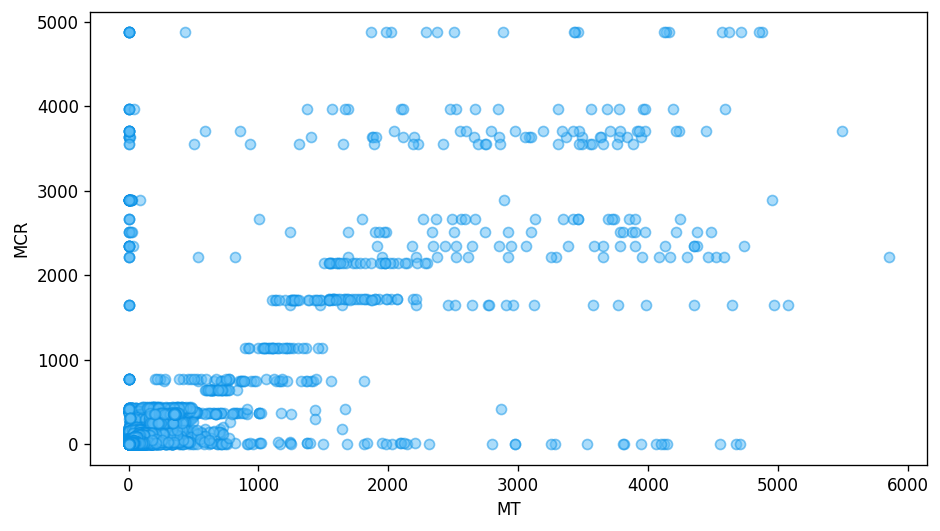

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
plt.ylabel('MCR', fontsize=10)
plt.xlabel('MT', fontsize=10)
plt.show()

Reshape + Split

In [15]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(134997, 1)
(134997,)
(44999, 1)
(44999,)


Model

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from numpy import mean

#model
gbr = GradientBoostingRegressor(learning_rate=0.05, subsample=0.8, n_estimators=50, min_samples_split=200, max_depth=5, min_samples_leaf=40)

#model evaluation
'''param_grid = {"min_samples_leaf":range(1,50,10)}
grid = GridSearchCV(gbr, param_grid, n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train, Y_train)
print(grid.best_params_)'''

#fit
gbr.fit(X_train, Y_train)

#prediction
Y_pred = gbr.predict(X_test)

# r2 score
print(gbr.score(X_train, Y_train))
print(gbr.score(X_test, Y_test))

0.6019929578980252
0.5704615160631522


Mean absolute percentage error (MAPE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  11.129152173675774
MAE :  13.11618744868631


Graph

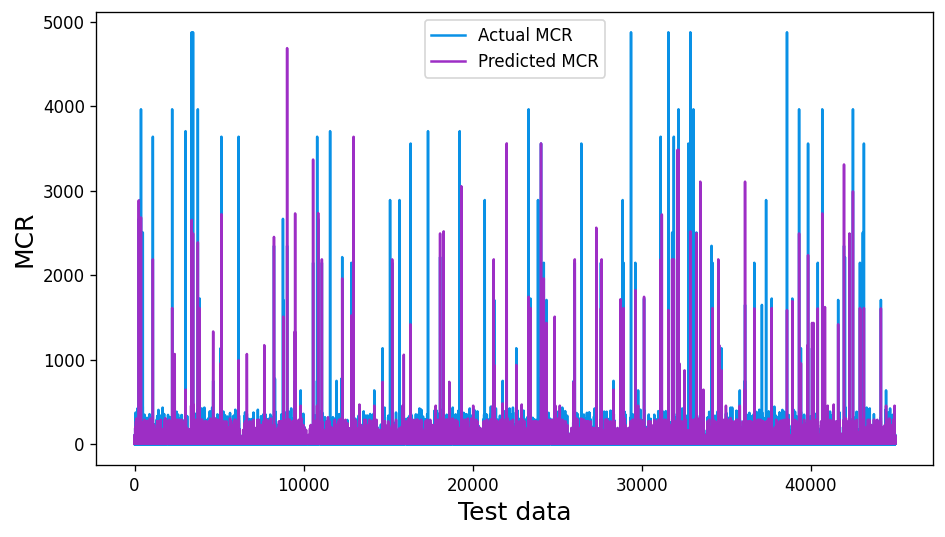

In [ ]:
plt.figure(figsize=(9, 5), dpi=120)
plt.plot(Y_test, label='Actual MCR', color="#0991e6")
plt.plot(Y_pred, label='Predicted MCR', color="#9D2EC5")
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data', fontsize=15)
plt.legend()
plt.show()